In [21]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# Load and data
df = pd.read_csv('sphist.csv')

In [3]:
# Clean data
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date', ascending=True)
df = df[df.Date > datetime(year=1951, month=6, day=18)]
df = df.dropna(axis=0)

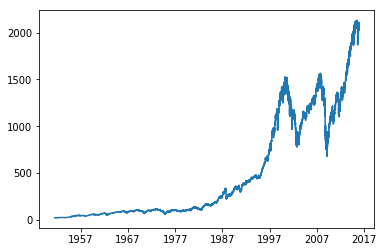

In [4]:
plt.plot(df['Date'], df['Close'])
plt.show()

In [5]:
# Creare features
def create_features(df, moving_average):
    df['Close MA'] = df['Close'].rolling(moving_average, min_periods=moving_average).mean()
    df['Volume MA'] = df['Volume'].rolling(moving_average, min_periods=moving_average).mean()    
    
    features = df.drop(['High','Low','Volume', 'Adj Close','Date','Close','Open'], axis=1)
    features = features.columns.tolist()
    
    for i in features:
        df[i] = df[i].shift(periods=1)
        
    return df, features

In [38]:
# Train model
def train_model(df, features):
    
    train = df[df.Date < datetime(year=2015, month=10, day=1)]
    test = df[df.Date >= datetime(year=2015, month=10, day=1)]
    train = train.dropna(axis=0)
    test = test.dropna(axis=0)

    target_cols = 'Close'

    min_max=preprocessing.MinMaxScaler()
    X_train = train[features]
    y_train = train[target_cols]
    X_test = test[features]
    y_test = test[target_cols]
    
    X_train = min_max.fit_transform(X_train)
    # Create linear regression object
    model = LinearRegression()
    # Train the model using the training sets
    model.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = model.predict(X_test)

    # The results
    print("Mean absolute error: %.2f"
          % mean_absolute_error(y_test, y_pred))
    return test, y_pred

In [39]:
def model_results(test, predictions, money):
    test['close_prediction'] = predictions
    test['Signal'] = np.where(test['close_prediction'] > test['Open'], 1, 0)
    backtest = test[['Date','Open','Close','Signal']]
    trades = backtest[backtest['Signal'] == 1]
    trades['Dollar Change'] = trades['Close'] - trades['Open']
    trades['Percent Change'] = (trades['Close'] / trades['Open']) - 1
    
    percent_trades = trades.shape[0]/test.shape[0]
    success = trades[trades['Dollar Change'] > 0].count().tolist()
    accuracy = success[0]/trades.shape[0]

    start_money = money

    for index, row in trades.iterrows():
        percent_change = row[2] / row[1]
        money = money * percent_change
    
    change = ((money/start_money)-1) * 100
    
    hodl_change = ((test['Open'].max()/test['Open'].min())-1)*100
    
    strat_vs_hodl = change - hodl_change
    
    print('You startd with {}'.format(start_money))
    print('You ended with {}'.format(money))
    print('You strategy resulted in {}% change'.format(change))
    print('The perfect hodl would have resulted in: {}% Change'.format(hodl_change))
    print('Your strategy perfomed {} compared to HODL'.format(strat_vs_hodl))
    print('********')
    print('Total trades made: {}'.format(trades.shape[0]))
    print('Total winning trades: {}'.format(success[0]))
    print('Total losing trades: {}'.format(trades.shape[0] - success[0]))
    print('Trading accuracy {}'.format(accuracy))

In [40]:
money = 10000

In [41]:
## 5 Day MA

In [44]:
test_df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Close MA,Volume MA,close_prediction,Signal
46,2015-10-01,1919.650024,1927.209961,1900.699951,1923.819946,3.983600e+09,1923.819946,1945.729338,3.865756e+09,-2.859127e+10,0
45,2015-10-02,1921.770020,1951.359985,1893.699951,1951.359985,4.378570e+09,1951.359985,1943.831331,3.889575e+09,-2.876746e+10,0
44,2015-10-05,1954.329956,1989.170044,1954.329956,1987.050049,4.334490e+09,1987.050049,1943.185327,3.966907e+09,-2.933950e+10,0
43,2015-10-06,1986.630005,1991.619995,1971.989990,1979.920044,4.202400e+09,1979.920044,1945.453328,4.055859e+09,-2.999748e+10,0
42,2015-10-07,1982.339966,1999.310059,1976.439941,1995.829956,4.666470e+09,1995.829956,1945.575334,4.120029e+09,-3.047215e+10,0


In [42]:
ma = 15
data, features = create_features(df, ma)
test_df, predictions = train_model(data, features)
model_results(test_df, predictions,money)

Mean absolute error: 28971156350.46


ZeroDivisionError: division by zero

In [14]:
## 15 Day MA

In [15]:
ma = 15
data, features = create_features(df, ma)
test_df, predictions = train_model(data, features)
model_results(test_df, predictions, money)

Mean absolute error: 32.34
You startd with 10000
You ended with 10415.189161968601
You strategy resulted in 4.15189161968601% change
The perfect hodl would have resulted in: 9.947129508644226% Change
Your strategy perfomed -5.795237888958216 compared to HODL
********
Total trades made: 10
Total winning trades: 6
Total losing trades: 4
Trading accuracy 0.6


In [222]:
## 30 Day MA

In [223]:
ma = 30
data, features = create_features(df, ma)
test_df, predictions = train_model(data, features)
model_results(test_df, predictions, money)

Mean absolute error: 44.39
You startd with 10000
You ended with 10410.960582855516
You strategy resulted in 4.109605828555152% change
The perfect hodl would have resulted in: 9.947129508644226% Change
Your strategy perfomed -5.837523680089074 compared to HODL
********
Total trades made: 8
Total winning trades: 5
Total losing trades: 3
Trading accuracy 0.625


In [224]:
## 55 Day MA

In [225]:
ma = 55
data, features = create_features(df, ma)
test_df, predictions = train_model(data, features)
model_results(test_df, predictions, money)

Mean absolute error: 52.61
You startd with 10000
You ended with 10582.681181925884
You strategy resulted in 5.826811819258837% change
The perfect hodl would have resulted in: 9.947129508644226% Change
Your strategy perfomed -4.120317689385389 compared to HODL
********
Total trades made: 9
Total winning trades: 7
Total losing trades: 2
Trading accuracy 0.7777777777777778


In [226]:
## 365 Day MA

In [227]:
ma = 365
data, features = create_features(df, ma)
test_df, predictions = train_model(data, features)
model_results(test_df, predictions, money)

Mean absolute error: 62.96
You startd with 10000
You ended with 10787.722740853054
You strategy resulted in 7.8772274085305405% change
The perfect hodl would have resulted in: 9.947129508644226% Change
Your strategy perfomed -2.0699021001136853 compared to HODL
********
Total trades made: 47
Total winning trades: 25
Total losing trades: 22
Trading accuracy 0.5319148936170213


In [228]:
ma = 1
data, features = create_features(df, ma)
test_df, predictions = train_model(data, features)
model_results(test_df, predictions, money)

Mean absolute error: 13.58
You startd with 10000
You ended with 9820.109340817316
You strategy resulted in -1.798906591826832% change
The perfect hodl would have resulted in: 9.947129508644226% Change
Your strategy perfomed -11.746036100471057 compared to HODL
********
Total trades made: 26
Total winning trades: 11
Total losing trades: 15
Trading accuracy 0.4230769230769231
